In [34]:
import pandas as pd 
import numpy as np

In [9]:
df = pd.read_excel(r'Downloads/chatgpt1.xlsx')
print(df)

                        Datetime             Tweet Id  \
0      2023-01-22 13:44:34+00:00  1617156270871689984   
1      2023-01-22 13:44:39+00:00  1617156291046129920   
2      2023-01-22 13:44:44+00:00  1617156308926340096   
3      2023-01-22 13:44:49+00:00  1617156332297250048   
4      2023-01-22 13:44:52+00:00  1617156345064570112   
...                          ...                  ...   
49996  2023-01-24 06:57:56+00:00  1617778712082089984   
49997  2023-01-24 06:57:59+00:00  1617778726393240064   
49998  2023-01-24 06:58:00+00:00  1617778728481989888   
49999  2023-01-24 06:58:01+00:00  1617778731678040064   
50000  2023-01-24 06:58:01+00:00  1617778733355790080   

                                                    Text         Username  \
0      ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...      mochico0123   
1      @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
2      Schaut Euch an, was @fobizz @DianaKnodel alles...            ciffi   
3      

In [13]:

#Creating a function that takes care of all the preprocessing stuff.
def preprocess():

  df['Text'] = df['Text'].str.lower() # Ensuring all words in the Tweet column of training data are lowercased

  # Parsing the stop_words.txt file and storing all the words in a list.
  stopwords = []
  with open('chatgpt1.xlsx','r') as file:    
      for line in file:         
          for word in line.split():            
              stopwords.append(word)

  # Removing all stopwords from all the tweets in training data.
  df["Text"] = trained["Text"].apply(lambda func: ' '.join(sw 
                                            for sw in func.split() 
                                            if sw not in stopwords))
    
  #Training Data
  df['Text'] = df['Text'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') # Removing hyperlinks from all the tweets
  df['Text'] = df['Text'].str.replace('@[A-Za-z0-9]+', '') # Removing usernames from all the tweets.
  df['Text'] = df['Text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') # Removing hashtags, including the text, from all the tweets
  df['Text'] = df['Text'].str.replace('\d+', '') # Removing numbers from all the tweets


  special_chars = ["!",'"',"%","&","amp","'","(",")", "*","+",",","-",".",
                  "/",":",";","<","=",">","?","[","\\","]","^","_",
                  "`","{","|","}","~","–","@","#","$"]

  for c in special_chars:
      df['Text'] = df['Text'].str.replace(c,'') # Removing all special characters from all the tweets

In [15]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,chatgptã§éšã¶ã®å¿˜ã‚œã¦ãÿï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@alexandrovnaing prohibition of chatgpt has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"schaut euch an, was @fobizz @dianaknodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,bow down to chatgpt ðÿ«¡..... https://t.co/ent...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"profilinde vatan, tã¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [17]:
# shape of dataframe
df.shape

(50001, 20)

In [18]:
df.isnull().sum()

Datetime              0
Tweet Id              0
Text                  5
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

No of training examples: 40001
No of testing examples: 10000 


In [21]:
y_col = 'Language'
y = df[y_col]

x_col = 'Text'
x = df [x_col]
y,x

(0        ja
 1        en
 2        de
 3        en
 4        tr
          ..
 49996    de
 49997    de
 49998    it
 49999    en
 50000    es
 Name: Language, Length: 50001, dtype: object,
 0        chatgptã§éšã¶ã®å¿˜ã‚œã¦ãÿï¼ï¼\næ›¸é¡žä...
 1        @alexandrovnaing prohibition of chatgpt has be...
 2        schaut euch an, was @fobizz @dianaknodel alles...
 3        bow down to chatgpt ðÿ«¡..... https://t.co/ent...
 4        profilinde vatan, tã¼rkiye falan yazan bireyle...
                                ...                        
 49996    #chatgpt ist ein #chatbot, der durch kã¼nstlic...
 49997    @r8r ich hab mal die ai dazu befragt (chatgpt)...
 49998    5 minuti di #chatgpt e ho capito che apprende ...
 49999    portland shop uses chatgpt to tell family stor...
 50000    ahora sueã±o con el dã­a en que amazon integre...
 Name: Text, Length: 50001, dtype: object)

In [36]:
#training of the x samples
training_data_x = x.sample(frac=0.8 , random_state=25)
training_data_x = x.drop(training_data_x.index)


testing_data_x = x.sample(frac=0.8 , random_state=25)
testing_data_x = x.drop(training_data_x.index)

print(f"No of training examples: {training_data.shape[0]}")
print(f"No of testing examples: {testing_data.shape[0]} ")

No of training examples: 40001
No of testing examples: 10000 


In [37]:
#training of the y samples
training_data_y = y.sample(frac=0.8 , random_state=25)
training_data_y = y.drop(training_data_x.index)


testing_data_y = y.sample(frac=0.8 , random_state=25)
testing_data_y = y.drop(training_data_x.index)

print(f"No of training examples: {training_data.shape[0]}")
print(f"No of testing examples: {testing_data.shape[0]} ")

No of training examples: 40001
No of testing examples: 10000 


In [38]:
def computeTF(wordDict , bagOfWords):
    tfDict ={}
    bagOfWordsCount = len(bagOfWords)
    for word , count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
        return tfDict

In [39]:
#CountVectorize
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Handle missing values
training_data_x = np.where(pd.isnull(training_data_x), '', training_data_x)
testing_data_x = np.where(pd.isnull(testing_data_x), '', testing_data_x)

# create CountVectorizer object
count_vect = CountVectorizer()

# fit and transform the training data
X_train_counts = count_vect.fit_transform(training_data_x)

# transform the testing data
X_test_counts = count_vect.transform(testing_data_x)


In [40]:
#CountTFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# create TfidfVectorizer object
tfidf_vect = TfidfVectorizer()

# fit and transform the training data
X_train_tfidf = tfidf_vect.fit_transform(training_data_x)

# transform the testing data
X_test_tfidf = tfidf_vect.transform(testing_data_x)


In [41]:
# Display the vectorized data for training set
print("Training set - Vectorized data:")
print(X_train_counts.toarray())

# Display the vectorized data for testing set
print("Testing set - Vectorized data:")
print(X_test_counts.toarray())


Training set - Vectorized data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing set - Vectorized data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
print("Number of samples in X_train_counts:", X_train_counts.shape[0])
print("Number of labels in training_data_y:", len(training_data_y))


Number of samples in X_train_counts: 10000
Number of labels in training_data_y: 40001


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree classifier
decision_tree.fit(X_train_counts, training_data_y[:X_train_counts.shape[0]])

# Predict on the testing set
decision_tree_preds = decision_tree.predict(X_test_counts)

# Calculate evaluation metrics
accuracy = accuracy_score(testing_data_y, decision_tree_preds)
precision = precision_score(testing_data_y, decision_tree_preds, average='macro')
recall = recall_score(testing_data_y, decision_tree_preds, average='macro')
f1 = f1_score(testing_data_y, decision_tree_preds, average='macro')

# Print the evaluation metrics
print("Decision Tree - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}"
      .format(accuracy, precision, recall, f1))


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree - Accuracy: 0.5232, Precision: 0.0182, Recall: 0.0174, F1 Score: 0.0169


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest classifier
random_forest.fit(X_train_counts, training_data_y[:X_train_counts.shape[0]])

# Predict on the testing set
random_forest_preds = random_forest.predict(X_test_counts)

# Calculate evaluation metrics
accuracy = accuracy_score(testing_data_y, random_forest_preds)
precision = precision_score(testing_data_y, random_forest_preds, average='macro')
recall = recall_score(testing_data_y, random_forest_preds, average='macro')
f1 = f1_score(testing_data_y, random_forest_preds, average='macro')

# Print the evaluation metrics
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}"
      .format(accuracy, precision, recall, f1))


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.6339, Precision: 0.0179, Recall: 0.0169, F1 Score: 0.0138


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train_counts, training_data_y[:X_train_counts.shape[0]])

# Predict on the testing set
knn_preds = knn.predict(X_test_counts)

# Calculate evaluation metrics
accuracy = accuracy_score(testing_data_y, knn_preds)
precision = precision_score(testing_data_y, knn_preds, average='macro')
recall = recall_score(testing_data_y, knn_preds, average='macro')
f1 = f1_score(testing_data_y, knn_preds, average='macro')

# Print the evaluation metrics
print("KNN - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}"
      .format(accuracy, precision, recall, f1))


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN - Accuracy: 0.6112, Precision: 0.0166, Recall: 0.0168, F1 Score: 0.0143


In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Multinomial Naïve Bayes classifier
naive_bayes = MultinomialNB()

# Train the Multinomial Naïve Bayes classifier
naive_bayes.fit(X_train_counts, training_data_y[:X_train_counts.shape[0]])

# Predict on the testing set
naive_bayes_preds = naive_bayes.predict(X_test_counts)

# Calculate evaluation metrics
accuracy = accuracy_score(testing_data_y, naive_bayes_preds)
precision = precision_score(testing_data_y, naive_bayes_preds, average='macro')
recall = recall_score(testing_data_y, naive_bayes_preds, average='macro')
f1 = f1_score(testing_data_y, naive_bayes_preds, average='macro')

# Print the evaluation metrics
print("Multinomial Naïve Bayes - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}"
      .format(accuracy, precision, recall, f1))


Multinomial Naïve Bayes - Accuracy: 0.6410, Precision: 0.0123, Recall: 0.0167, F1 Score: 0.0131


/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
!pip install scikit-learn

SyntaxError: EOL while scanning string literal (671542044.py, line 1)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Determine the appropriate number of clusters using the silhouette score
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42 )
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Determine the appropriate number of clusters using the elbow method
inertia_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

# Plot the inertia scores
plt.plot(range(2, max_clusters + 1), inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Score vs Number of Clusters')
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

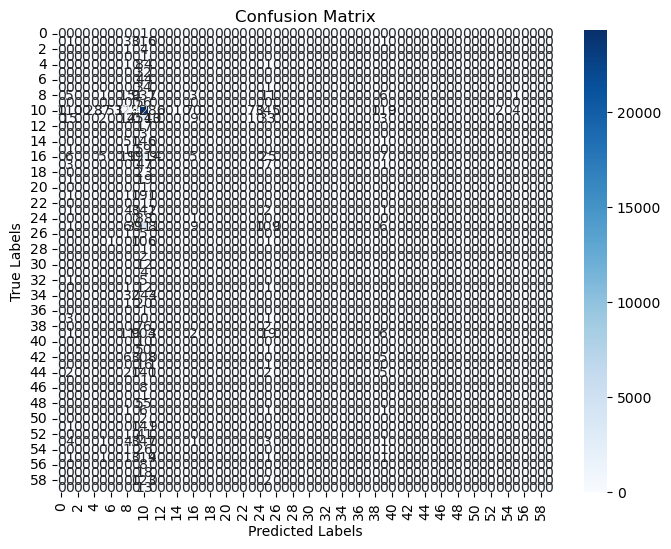

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_matrix = confusion_matrix(testing_data_y, knn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [72]:
!pip install --upgrade threadpoolctl

1

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [ ]:
!pip uninstall threadpoolctl
!pip install threadpoolctl


Found existing installation: threadpoolctl 3.1.0
Uninstalling threadpoolctl-3.1.0:
  Would remove:
    /Users/student/anaconda3/lib/python3.9/site-packages/threadpoolctl-3.1.0.dist-info/*
    /Users/student/anaconda3/lib/python3.9/site-packages/threadpoolctl.py
Proceed (Y/n)? 

In [ ]:
y